<a href="https://colab.research.google.com/github/Zamariolo/Datasets/blob/master/covid19MogiGuacu.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Análise dos dados de COVID-19 em Mogi Guaçu

In [0]:
import pandas as pd
import matplotlib.pyplot as plt

In [0]:
dataset = pd.read_csv('https://raw.githubusercontent.com/Zamariolo/MogiOpenData/master/Dados/dadosCasosCOVIDMogiGuacu.csv')

In [104]:
dataset

,Unnamed: 0,dia desde 1 contagio,data,casos,mortes,Ativos,confirmado por 100k hab,taxa morte contaminados,Curados,Casos negativos,Testes realizados,novosCasos
0,0,1,30/03/2020,1,0,NaN,"0,658379859",0,0.0,2,3,1
1,1,2,31/03/2020,1,0,NaN,"0,658379859",0,NaN,3,4,0
2,2,3,01/04/2020,1,0,NaN,"0,658379859",0,NaN,4,5,0
3,3,4,02/04/2020,1,0,NaN,"0,658379859",0,NaN,7,8,0
4,4,5,03/04/2020,1,0,NaN,"0,658379859",0,NaN,9,10,0
5,5,6,04/04/2020,1,0,NaN,"0,658379859",0,NaN,9,10,0
6,6,7,05/04/2020,1,0,NaN,"0,658379859",0,NaN,9,10,0
7,7,8,06/04/2020,2,0,NaN,"1,316759718",0,NaN,16,18,1
8,8,9,07/04/2020,2,1,NaN,"1,316759718","0,5",NaN,17,19,0
9,9,10,08/04/2020,4,1,NaN,"2,633519435","0,25",NaN,22,26,2


# Quando foi a última atualização dos dados aqui atualizados?

In [105]:
print("Dados atualizados em: %s" %dataset['data'].max())

Dados atualizados em: 31/03/2020


# Quem coleta e como são coletados os dados de isolamento em Mogi Guaçu?

Os dados são obtidos através boletins oficiais da prefeitura de Mogi Guaçu nas redes sociais, dada a velocidade de atualização e em seguida verificados com os dados do Ministério da Saúde. Não estão considerados nos dados nenhuma informação sobre casos suspeitos, apenas casos testados.



# Quais são as informações contidas nestes dados?

In [106]:
dataset.head(3)

,Unnamed: 0,dia desde 1 contagio,data,casos,mortes,Ativos,confirmado por 100k hab,taxa morte contaminados,Curados,Casos negativos,Testes realizados,novosCasos
0,0,1,30/03/2020,1,0,NaN,"0,658379859",0,0.0,2,3,1
1,1,2,31/03/2020,1,0,NaN,"0,658379859",0,NaN,3,4,0
2,2,3,01/04/2020,1,0,NaN,"0,658379859",0,NaN,4,5,0




*   **dia desde 1 contagio**: Contagem dos dias desde o primeiro contagio confirmado na cidade;
*   **data**: Data da informação;
*   **casos**: Casos acumulados de COVID-19 confirmados (inclui os casos ativos, mortes e pessoas curadas);
*   **mortes**: Número de mortes que testaram positivo para COVID-19;
*   **Ativos**: Número de pessoas que testaram positivo pela COVID-19, estão ou não internadas (casos totais - mortes - curados);
*   **confirmado por 100k hab**: Número de casos acumulados (coluna casos) para cada 100 mil habitantes;
*   **taxa morte contaminados**: Taxa de casos que terminaram em morte dado o numéro total de casos;
*   **Curados**: número de pessoas que testaram positivo para COVID-19 e se recuperaram;
*   **Casos negativos**: Quantidade de pessoas que testaram negativo para COVID-19;
*   **Testes realizados**: Quantidade total de testes realizados (testes positivos + testes negativos).



# Como está o histórico de casos?

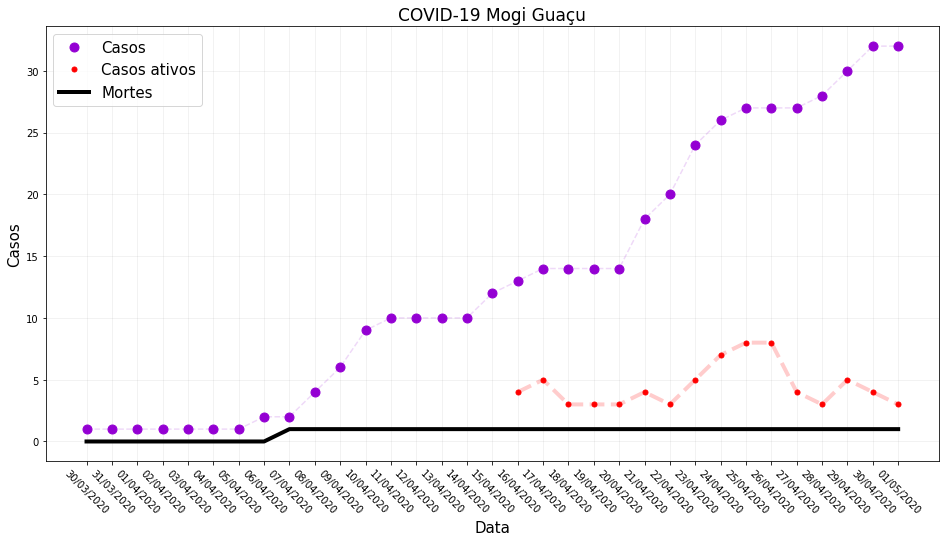

In [107]:
plt.figure(figsize=(16,8))

plt.plot(dataset['data'], dataset['casos'], '.', markersize=18, color='darkviolet', label='Casos')
plt.plot(dataset['data'], dataset['Ativos'], '.', color='red', label="Casos ativos", markersize=10)

plt.plot(dataset['data'], dataset['casos'], '--', alpha=0.15, color='darkviolet')
plt.plot(dataset['data'], dataset['Ativos'], '--', color='red', linewidth=4, alpha=0.2)
plt.plot(dataset['data'], dataset['mortes'],'k', linewidth=4, label='Mortes')
plt.xlabel("Data", fontsize=15)
plt.ylabel("Casos", fontsize=15)
plt.title("COVID-19 Mogi Guaçu", fontsize=17)
plt.grid(alpha=0.1, color='dimgray')
plt.xticks(dataset['data'], rotation=315)
plt.legend(fancybox=True, prop={'size': 15})

plt.show()

# Histórico de testes realizados

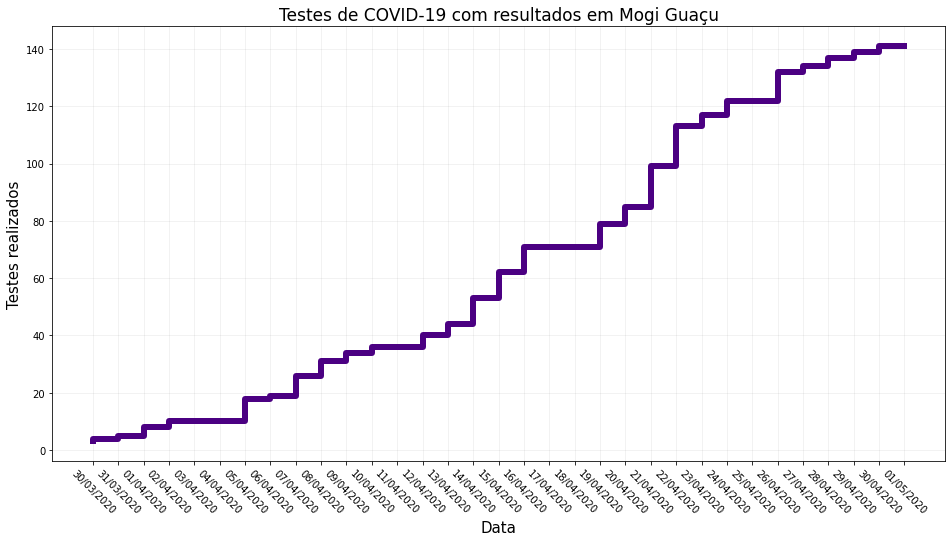

In [108]:
plt.figure(figsize=(16,8))

plt.step(dataset['data'], dataset['Testes realizados'], color='indigo', linewidth=6)
plt.xticks(dataset['data'], rotation=315)
plt.grid(alpha=0.1, color='dimgray')
plt.ylabel("Testes realizados", fontsize=15)
plt.xlabel("Data", fontsize=15)
plt.title("Testes de COVID-19 com resultados em Mogi Guaçu", fontsize=17)
plt.show()

# Considerando desde o primeiro contágio quantos casos novos ocorreram por dia?

In [109]:
casosTotais = dataset['casos'].max()
diasDesde1Contagio = dataset['dia desde 1 contagio'].max()
print("Ocorreram em média %.1f novos casos por dia" %(casosTotais/diasDesde1Contagio))

Ocorreram em média 1.0 novos casos por dia


# Considerando os últimos 7 dias, em média, quantos novos casos ocorreram por dia?

In [110]:
dados = dataset[-7:]
novosCasos = dados['casos'].max() - dados['casos'].min()
print("Nos ultimos 7 dias ocorreram, em média, %.1f novos casos por dia" %(novosCasos/7))

Nos ultimos 7 dias ocorreram, em média, 0.7 novos casos por dia


# O número de novos casos está aumentando com o tempo?

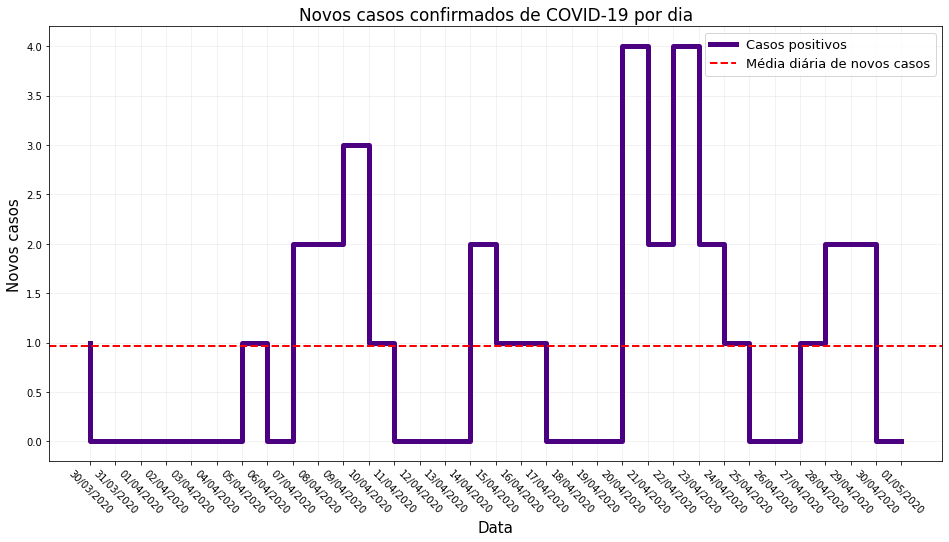

In [111]:
plt.figure(figsize=(16,8))
plt.step(dataset['data'], dataset['novosCasos'], label="Casos positivos", color='indigo', linewidth=5)
plt.axhline(dataset['novosCasos'].mean(), linestyle='--', label="Média diária de novos casos", color='red', linewidth=2)
plt.xlabel("Data", fontsize=15)
plt.ylabel("Novos casos", fontsize=15)
plt.grid(alpha=0.1, color='dimgray')
plt.legend(fontsize=13)
plt.title("Novos casos confirmados de COVID-19 por dia", fontsize=17)
plt.xticks(dataset['data'], rotation=315)
plt.show()